In [1]:
import pandas as pd
import numpy as np
import os
import time
os.chdir('C:/Users/aacraig/Documents/ContextEdge')

# Import ContextEdgeProcessor
from ContextEdge14 import ContextEdgePreprocessor

#### Testing the lemmatization code in ContextEdge14

In [143]:
t0 = time.time()

# -------------------------------------------------------------------------------------------------
# This function returns the dream dataset: 'df', a dictionary of sparse tfidf matrices: 'tfidf_dict', 
# and a dictionary of feature lists for each text feature: 'tfidf_features_dict'
# 
# option notes:
# - 'min_proportion': sets value of 'min_df' in TfidfVectorizer
# - 'max_proportion': sets value of 'max_df' in TfidfVectorizer
# - 'ngram_span': sets value of 'ngram_range' in TfidfVectorizer
# - 'perform_vectoriz_ops': if set to False, only data cleaning and feature manipulations are performed.
#                        ** The returned objects 'tfidf_dict' and 'tfidf_features_dict' are empty
# - 'mode': possible values are:
#           - 'lemma_tfidf_matrix'
#           - 'stem_tfidf_matrix'
#           - 'lemma_dtf_matrix'
#           - 'stem_dtf_matrix'
# - 'text_features': list of the text features to include in the tfidf operations
# -------------------------------------------------------------------------------------------------

df, matrices_dict, features_dict = ContextEdgePreprocessor(filename = 'processed_contextedge_input_file_v2.csv', \
                                                                  raw_input_file = False, \
                                                                  min_proportion = 200, \
                                                                  max_proportion = 0.5, \
                                                                  text_features = ['all_scenes_text'],
                                                                  ngram_span = (1,2), \
                                                                  perform_vectoriz_ops = True,\
                                                                  mode = 'lemma_tfidf_matrix')
t1 = time.time()
print('The function took {} seconds to run.'.format(np.round(t1-t0, decimals = 1)))

No data cleaning was performed, since "raw_input_file" was set to False.
 
Lemmatizing the text feature: all_scenes_text.
Generating the tfidf matrix for text feature: all_scenes_text.
The tfidf operations for the feature: all_scenes_text took 2028.9 seconds to complete.
The function took 2039.8 seconds to run.


#### Looking at the returned dataframe

In [144]:
df.head()

,id,name,date,scene_one,scene_two,scene_three,scene_four,location,context,year,month,day,country,state_region,all_scenes_text
0,Journal-000342,The Blood Moon,5/15/1980,Many years into my future I am driving a car t...,This dream happened many years ago but has nev...,NaN,NaN,"Ohio, United States",NaN,1980,5,15,USA,OH,Many years into my future I am driving a car t...
1,Journal-000516,Vison of Jesus Prior to me getting saved,1/10/1981,I was living with my boyfriend at his mothers ...,NaN,NaN,NaN,NaN,NaN,1981,1,10,NaN,NaN,I was living with my boyfriend at his mothers ...
2,Journal-001517,Losing control and fear,5/19/1992,The first dream I remember was of me knocking ...,NaN,NaN,NaN,"Pennsylvania, United States",NaN,1992,5,19,USA,PA,The first dream I remember was of me knocking ...
3,Journal-001554,Dream Refresh Edit,7/23/1993,Dasdasdadadasdsad,NaN,NaN,NaN,"Cherkas, Ukr",NaN,1993,7,23,Ukraine,Cherkas,Dasdasdadadasdsad
4,Journal-000149,Dream,8/1/1996,Im sitting in the church school building Someo...,NaN,NaN,NaN,NaN,Joy,1996,8,1,NaN,NaN,Im sitting in the church school building Someo...


#### Looking at the returned tfidf matrix

In [145]:
tfidf_matrix = matrices_dict['all_scenes_text']
tfidf_matrix

<50620x2312 sparse matrix of type '<class 'numpy.float64'>'
	with 2150996 stored elements in Compressed Sparse Row format>

#### Looking at the list of features

In [146]:
features_list = features_dict['all_scenes_text']

In [147]:
len(features_list)

2312

In [148]:
features_list[:8]

['able',
 'able pron',
 'accept',
 'accept pron',
 'accident',
 'act',
 'actual',
 'actually']

# Latent Sentiment Analysis (LSA)

#### Importing TruncatedSVD from sklearn

In [149]:
from sklearn.decomposition import TruncatedSVD

#### Setting the number of components/topics/sentiments for the model to construct

In [150]:
no_topics = 12

#### Defining SVD

In [151]:
svd = TruncatedSVD(n_components=no_topics, algorithm='randomized',n_iter=200, random_state=42)

#### Constructing the LSA model

In [152]:
lsa_model = svd.fit(tfidf_matrix)

In [153]:
lsa_model.components_

array([[ 0.02148442,  0.00421446,  0.00599113, ...,  0.00496055,
         0.00962378,  0.00527171],
       [-0.00663786, -0.00088759,  0.00865534, ...,  0.0026057 ,
         0.00560694,  0.00102147],
       [-0.01150775, -0.00172315, -0.00370324, ...,  0.00073084,
         0.00118953,  0.00197807],
       ..., 
       [ 0.00728207,  0.00271719, -0.00221307, ...,  0.00235879,
        -0.00181482, -0.00072197],
       [-0.00937188, -0.00329815,  0.00200876, ...,  0.00491941,
         0.00075723, -0.00254478],
       [ 0.00746816,  0.00093247,  0.00946327, ..., -0.00262779,
         0.00543867,  0.00183644]])

#### Transforming the tfidf matrix

In [154]:
lsa_topic_matrix = lsa_model.transform(tfidf_matrix)

In [155]:
lsa_topic_matrix.shape

(50620, 12)

In [156]:
lsa_topic_matrix

array([[ 0.24611649, -0.06965956, -0.06839986, ..., -0.0432586 ,
         0.00939942, -0.07532327],
       [ 0.36725194,  0.01029516, -0.01748988, ..., -0.08484566,
         0.02908731, -0.08045918],
       [ 0.15476339, -0.15335754, -0.01050487, ..., -0.10560555,
        -0.07840972, -0.05554108],
       ..., 
       [ 0.1418935 , -0.00893996, -0.00567189, ..., -0.018583  ,
        -0.02708761,  0.0127376 ],
       [ 0.15018989, -0.00247896,  0.00307326, ...,  0.02468425,
        -0.04646287,  0.0170457 ],
       [ 0.11332769,  0.01725499,  0.08079498, ..., -0.0642917 ,
        -0.00452914,  0.02825855]])

# Analyzing the model

#### Defining helper functions

In [157]:
from collections import Counter

#### Making a copy of no_topics so it will work with kaggle tutorial code

In [158]:
n_topics = no_topics

In [159]:
# Define helper functions
def get_keys(topic_matrix):
    '''returns an integer list of predicted topic categories for a given topic matrix'''
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys

def keys_to_counts(keys):
    '''returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

def get_top_n_words(n_words, keys, document_term_matrix, count_vectorizer):
    '''returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n_words:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

#### Getting the topics for each dream & the number of dreams in each category

In [160]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [161]:
lsa_categories

[0, 2, 5, 9, 11, 1, 3, 7, 6, 4, 10, 8]

In [162]:
lsa_counts

[40202, 190, 960, 608, 1650, 1249, 1293, 593, 1005, 1381, 663, 826]

#### Making a dictionary to hold the counts for each topic/category

In [163]:
categories_counts = dict([['topic_'+str(x), y] for (x,y) in zip(lsa_categories, lsa_counts)])

In [164]:
categories_counts

{'topic_0': 40202,
 'topic_1': 1249,
 'topic_10': 663,
 'topic_11': 1650,
 'topic_2': 190,
 'topic_3': 1293,
 'topic_4': 1381,
 'topic_5': 960,
 'topic_6': 1005,
 'topic_7': 593,
 'topic_8': 826,
 'topic_9': 608}

#### Looking at top words for each topic/category

#### Importing TfidfVectorizer again

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_lg
nlp = en_core_web_lg.load()

#### Relemmatizing docs

In [166]:
# Redefining custom lemmatizer
def lemmatizer(text):
    sent = []
    # doc = nlp(text)
    sent = [x.lemma_ for x in nlp(text)]
    return " ".join(sent)

In [167]:
# Getting all dreams and re-lemmatizing them
all_dreams = df['all_scenes_text'].tolist()

lemma_dreams = list(map(lemmatizer, all_dreams))

#### Redefining a temporary vectorizer

In [168]:
temp_vectorizer = TfidfVectorizer(min_df =200, max_df = 0.35, stop_words = 'english', ngram_range = (1,2)).fit(lemma_dreams)

#### Getting top words

In [169]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, tfidf_matrix, temp_vectorizer)

#### Getting the top words for each topic

In [170]:
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i), top_n_words_lsa[i])

Topic 0:  say like look come know house people tell pron say say pron
Topic 1:  god pray word spirit lord god pron holy jesus church pron pray
Topic 2:  say pron say say pron ask ask pron pron ask tell tell pron mom car
Topic 3:  mean pron mean baby mean pron pregnant tell tell pron pron pregnant mean dream dream mean
Topic 4:  car drive pron car car pron pron drive drive pron road seat mean park
Topic 5:  baby baby pron pron baby pregnant birth hold girl boy baby girl pron pregnant
Topic 6:  mean pron mean mean pron mean dream look white black like person vision
Topic 7:  remember pron remember remember pron know pron know know pron like remember dream think number
Topic 8:  snake husband pron husband wake pron wake sleep night husband pron wake pron bed
Topic 9:  snake tell tell pron pron tell snake pron bite dream snake bite pron try pron snake
Topic 10:  husband pron husband husband pron husband dream vision look church tell tell pron like
Topic 11:  water message thank thank pron 

#### Visualizing top 3 words for each topic

In [171]:
import matplotlib.pyplot as plt

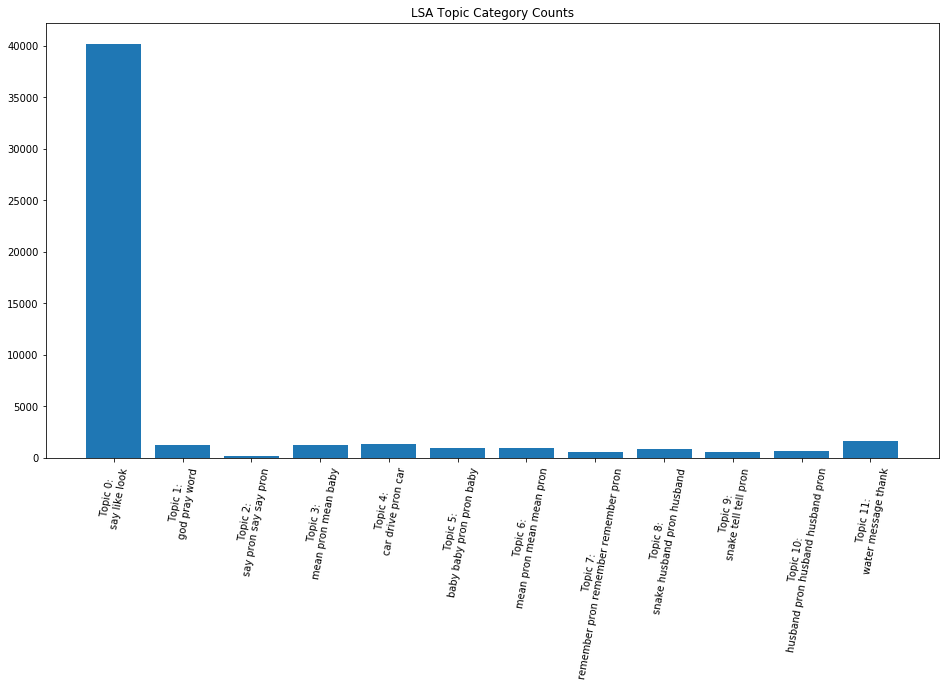

In [172]:
top_3_words = get_top_n_words(3, lsa_keys, tfidf_matrix, temp_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts)
ax.set_xticks(lsa_categories)
ax.set_xticklabels(labels)
ax.set_title('LSA Topic Category Counts')
plt.xticks(rotation = 80)
plt.figure(figsize = (14,8))
plt.show()